# 경제 분석 및 예측과 데이터 지능 실습4.5: Volatility Modeling

파이썬 라이브러리 arch를 활용하여 변동성 모델링을 실습해 봅니다.

출처: https://arch.readthedocs.io/en/stable/univariate/univariate_volatility_modeling.html

In [1]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

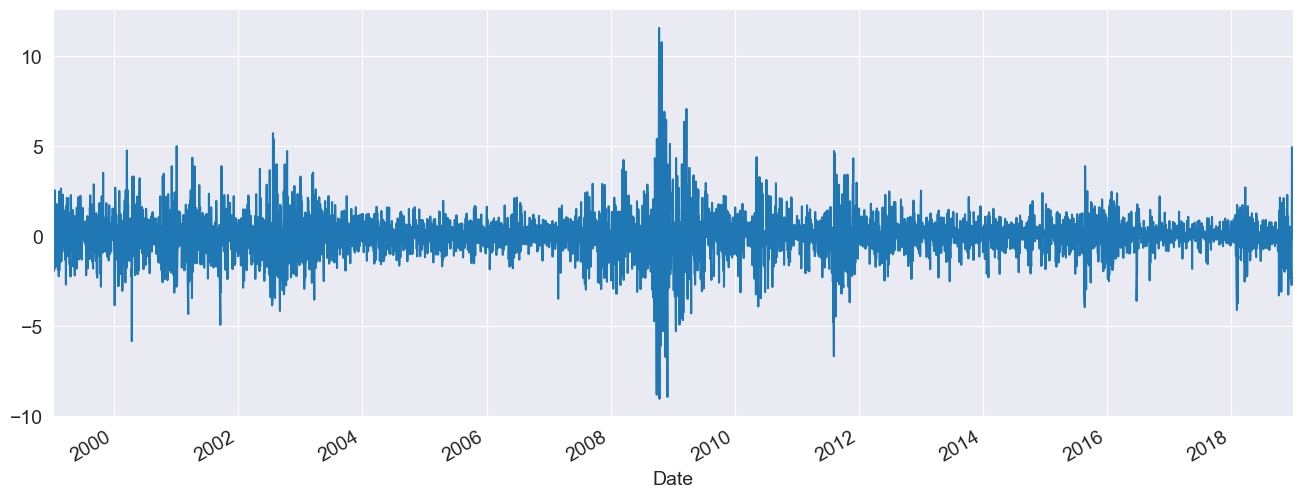

In [2]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())


In [3]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())


Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.276324897703
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482349
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476989
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Sat, May 17 2025   Df Residuals:                     5029
Time:             

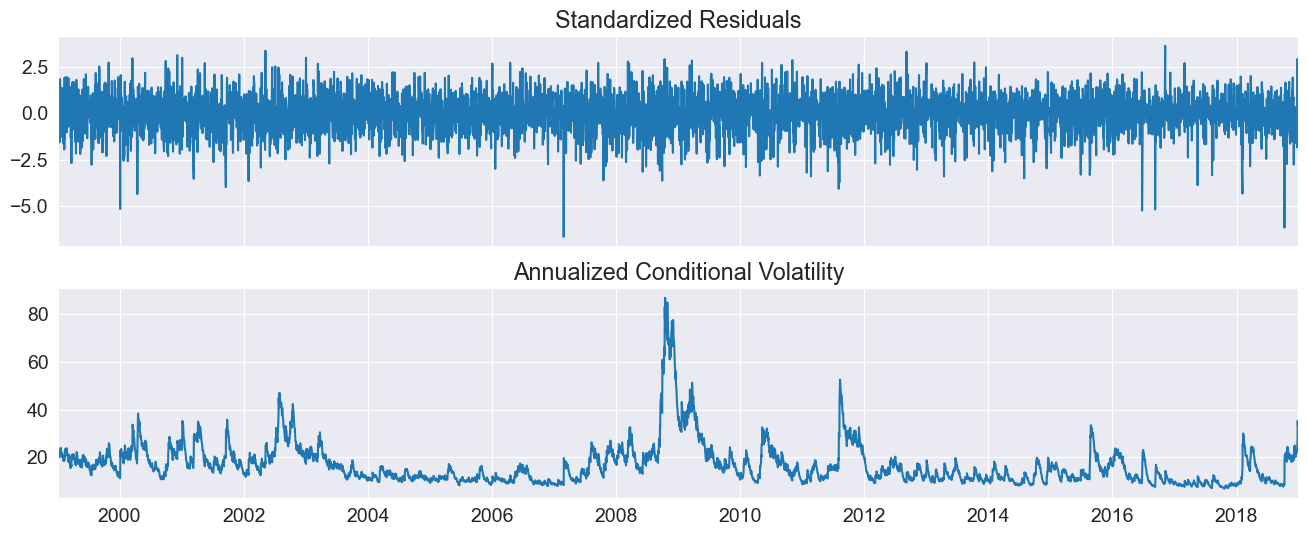

In [4]:
fig = res.plot(annualize="D")


In [11]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 6828.79497507721
Iteration:     10,   Func. Count:     79,   Neg. LLF: 6799.178672302201
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6799.1785211188135
            Iterations: 13
            Function evaluations: 97
            Gradient evaluations: 13
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -6799.18
Distribution:                  Normal   AIC:                           13608.4
Method:            Maximum Likelihood   BIC:                           13641.0
                                        No. Observations:                 5030
Date:                Sat, May 17 2025   Df Residuals:                     5029
Time:          

In [12]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     50,   Neg. LLF: 6729.01570906705
Iteration:     10,   Func. Count:     90,   Neg. LLF: 6722.151184679789
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6722.15118359044
            Iterations: 13
            Function evaluations: 110
            Gradient evaluations: 12
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -6722.15
Distribution:      Standardized Student's t   AIC:                           13456.3
Method:                  Maximum Likelihood   BIC:                           13495.4
                                              No. Observations:                 5030
Date:                      Sat, May 17 2025   Df Resi

In [14]:
fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
print(fixed_res.summary())


                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                     Adj Close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -6908.93
Distribution:       Standardized Student's t   AIC:                           13829.9
Method:            User-specified Parameters   BIC:                           13869.0
                                               No. Observations:                 5030
Date:                       Sat, May 17 2025                                         
Time:                               16:58:47                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
gamma[1]       0.0000
beta[1

(10596.0, 17896.0)

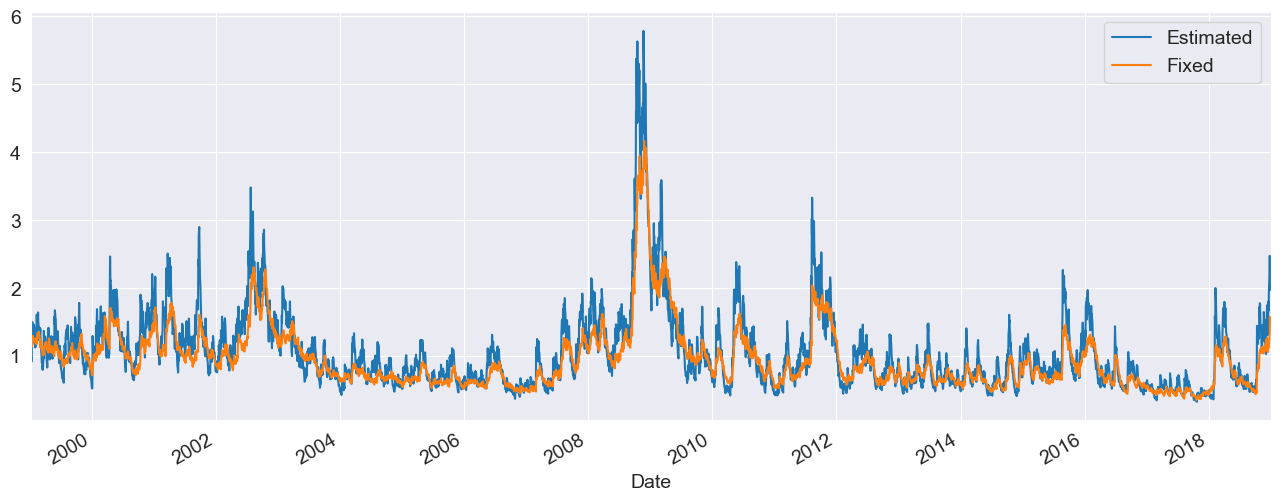

In [15]:
import pandas as pd

df = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], axis=1)
df.columns = ["Estimated", "Fixed"]
subplot = df.plot()
subplot.set_xlim(xlim)


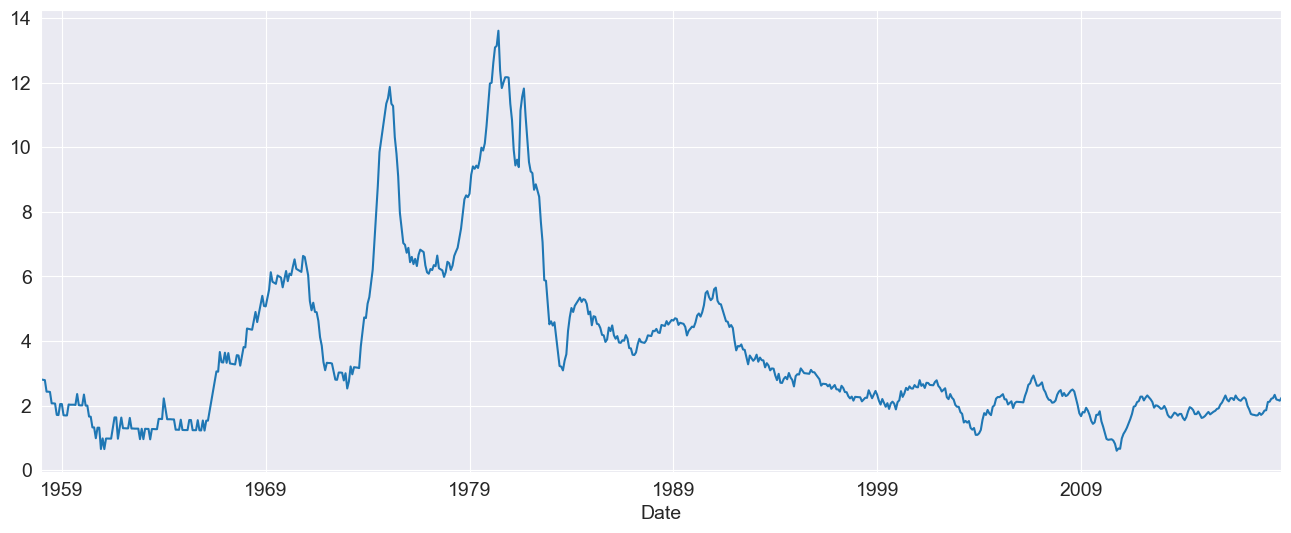

In [16]:
import arch.data.core_cpi

core_cpi = arch.data.core_cpi.load()
ann_inflation = 100 * core_cpi.CPILFESL.pct_change(12).dropna()
fig = ann_inflation.plot()


In [17]:
from arch.univariate import ARX

ar = ARX(100 * ann_inflation, lags=[1, 3, 12])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:               CPILFESL   R-squared:                       0.991
Mean Model:                        AR   Adj. R-squared:                  0.991
Vol Model:          Constant Variance   Log-Likelihood:               -3299.84
Distribution:                  Normal   AIC:                           6609.68
Method:            Maximum Likelihood   BIC:                           6632.57
                                        No. Observations:                  719
Date:                Sat, May 17 2025   Df Residuals:                      715
Time:                        17:00:11   Df Model:                            4
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const            4.0216      2.030      1.981  4.

In [18]:
from arch.univariate import GARCH

ar.volatility = GARCH(p=5, q=5)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:               CPILFESL   R-squared:                       0.991
Mean Model:                        AR   Adj. R-squared:                  0.991
Vol Model:                      GARCH   Log-Likelihood:               -3136.14
Distribution:                  Normal   AIC:                           6302.29
Method:            Maximum Likelihood   BIC:                           6370.96
                                        No. Observations:                  719
Date:                Sat, May 17 2025   Df Residuals:                      715
Time:                        17:00:42   Df Model:                            4
                                   Mean Model                                   
                   coef    std err          t      P>|t|        95.0% Conf. Int.
--------------------------------------------------------------------------------
Const            2.5680      2.837      0.905 

In [19]:
from arch.univariate import EGARCH

ar.volatility = EGARCH(p=1, o=1, q=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                          AR - EGARCH Model Results                           
Dep. Variable:               CPILFESL   R-squared:                       0.991
Mean Model:                        AR   Adj. R-squared:                  0.991
Vol Model:                     EGARCH   Log-Likelihood:               -3137.94
Distribution:                  Normal   AIC:                           6291.88
Method:            Maximum Likelihood   BIC:                           6328.50
                                        No. Observations:                  719
Date:                Sat, May 17 2025   Df Residuals:                      715
Time:                        17:01:10   Df Model:                            4
                                   Mean Model                                   
                   coef    std err          t      P>|t|        95.0% Conf. Int.
--------------------------------------------------------------------------------
Const            3.2122  7.711e-02     41.655 